In [1]:
import collections   
import pandas as pd   
import matplotlib.pyplot as plt   
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud
import nltk
nltk.download(["stopwords","vader_lexicon","punkt","wordnet"])
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from numpy import asarray

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajsi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv(r"C:\Users\rajsi\OneDrive\Desktop\git_unsw\Bollywoodsongs-sentimentanalysis-\data\cleaned_file.csv")

In [3]:
df

,Unnamed: 0,songs,artist,year,Lyrics,translated_Lyrics,Processed_Translated_Lyrics
0,0,Ole Ole,Abhijeet,1994,"Ole ole dil dole dil bole,Main tera tu meri ma...","Ole ole heart sway heart said,I am yours in me...",hey hey heart sway heart said love love hey he...
1,1,Yeh Raat Aur Yeh Doorie,"Asha Bhosle, S.P. Balasubrahmanyam",1994,"Zaroori,Ye raat aur ye doori, tera milna hai z...","Zaroori,This night and this distance, I defini...",important night distance definitely need meet ...
2,2,Aaja Meri Gaadi Mein Baith Jaa,"Baba Sehgal, Anu Malik",1994,"Dhup mein chalongi to baal pak jayenge,Paidal ...",If you walk in the sun the hair will get cooke...,walk sun hair get cooked walk feet feet get ti...
3,3,Meri Pant Bhi Sexy,"Govinda, Alka Yagnik",1994,"Arey ek hai anaar yahan,Kitne bimar yaha,Ye bh...","Hey there is a pineapple here, so many sick pe...",hey pineapple many sick people give every sing...
4,4,Dil Mein Tere,"Jolly Mukherjee, Alka Yagnik",1994,"Dil Dil Dil Dil Mai Tere Pyar Me Khoya,Mai Sar...","Dil heart heart I am lost in your love,I didn'...",heart heart heart lost love sleep whhey night ...
...,...,...,...,...,...,...,...
525,525,Bachpan Ka Pyaar,Badshah,2024,"Jaane meri jaaneman, bachpan ka pyaar mera bhu...","Dear my love, I will never forget my childhood...",dear love never forget childhood love way love...
526,526,Paani Paani,Badshah,2024,"Main toh tere vaaste huyi paani paani,Saare aa...",I was the water that fell under your possessio...,water fell possession youth looted publicly x2...
527,527,Jugnu,Badshah,2024,Ho jo na paas tu to aati dhangh se saanse nahi...,"If you are not near me, I can't breathe easily...",near breathe easily remain irritated feel noth...
528,528,Bad Boy X Bad Girl,Badshah,2024,"I Like The Way You Move Right There,Blow My Mi...","I Like The Way You Move Right There,Blow My Mi...",like way move right blow mind everytime come a...


In [4]:
stop_words = stopwords.words('english')
stop_words.extend(['or', 'm', 'ma', 'ours', 'against', 'nor', "it's", 'o', 
'wasn', 'hasn', 'my', 'had', 'didn', 'isn', 'did', 'aren', 'those', 'than', 
"mustn't", "you've", 'to', 'she', 'having', "haven't", 'into', 't', 'll', 
'himself', 'do', "that'll", 'so', 'of', 'on', 'very', 'for', 'out', 'were', 
'should', 'they', 'ain', "should've", 'you', "didn't", 'yours', 'was', 'our',
 'can', 'myself', "shouldn't", 'have', 'up', 'mightn', "you'll", 'any', 
'itself', 'hadn', 'him', 'doesn', 'weren', 'y', 'being', "don't", 'them', 
'are','and', 'that', 'your', 'yourself', 'their', 'some', 'ourselves', 've', 
'doing', 'been', 'shouldn', 'yourselves', "mightn't", 'most', 'because',
 'few', 'wouldn', "you'd", 'through', "you're", 'themselves', 'an', 'if',
 "wouldn't", 'its', 'other', "won't", "wasn't", "she's", 'we', 'shan',
 "weren't",'don',"hadn't", 'this', 'off', 'while', 'a', 'haven', 'her', 
'theirs', 'all', "hasn't", "doesn't", 'about', 'then', 'by','such', 'but', 
'until', 'each', 'there', "aren't", 'with', 'not', "shan't", 'hers', 'it', 
'too', 'i', 'at', 'is', 'as', 'me', 'herself', 's', 'the', 'where', 'am', 
'has', 'over', "couldn't", 'when', 'does', 'mustn','re', 'no', 'in', 'who', 
'd', 'own', 'he', 'be', "isn't", 'his', 'these', 'same', 'whom', 'will', 
'needn','couldn', 'from', 'also']) 

In [43]:
def preprocess_text(text):
    # Tokenise words & ignore punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Convert to lowercase and remove stop words
    processed_words = [token.lower() for token in tokens if token.lower() not in stop_words]
    return ' '.join(processed_words)

# Assuming df is your DataFrame
df['Processed_Translated_Lyrics'] = df['translated_Lyrics'].apply(preprocess_text)

# Display the first few rows to verify
print(df.head())


   Unnamed: 0                           songs  \
0           0                         Ole Ole   
1           1         Yeh Raat Aur Yeh Doorie   
2           2  Aaja Meri Gaadi Mein Baith Jaa   
3           3              Meri Pant Bhi Sexy   
4           4                   Dil Mein Tere   

                               artist  year  \
0                            Abhijeet  1994   
1  Asha Bhosle, S.P. Balasubrahmanyam  1994   
2              Baba Sehgal, Anu Malik  1994   
3                Govinda, Alka Yagnik  1994   
4        Jolly Mukherjee, Alka Yagnik  1994   

                                              Lyrics  \
0  Ole ole dil dole dil bole,Main tera tu meri ma...   
1  Zaroori,Ye raat aur ye doori, tera milna hai z...   
2  Dhup mein chalongi to baal pak jayenge,Paidal ...   
3  Arey ek hai anaar yahan,Kitne bimar yaha,Ye bh...   
4  Dil Dil Dil Dil Mai Tere Pyar Me Khoya,Mai Sar...   

                                   translated_Lyrics  \
0  Ole ole heart sway heart s

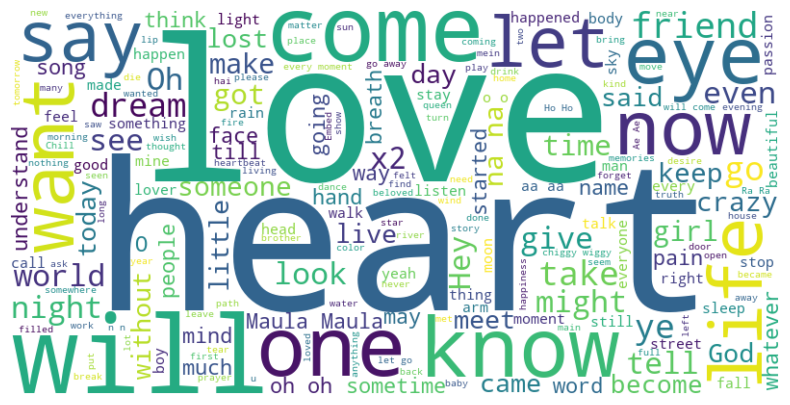

In [5]:
all_lyrics = ' '.join(df['translated_Lyrics'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\rajsi\AppData\Local\Temp\ipykernel_11412\858909699.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='bigram', data=top_bigrams, palette='viridis')


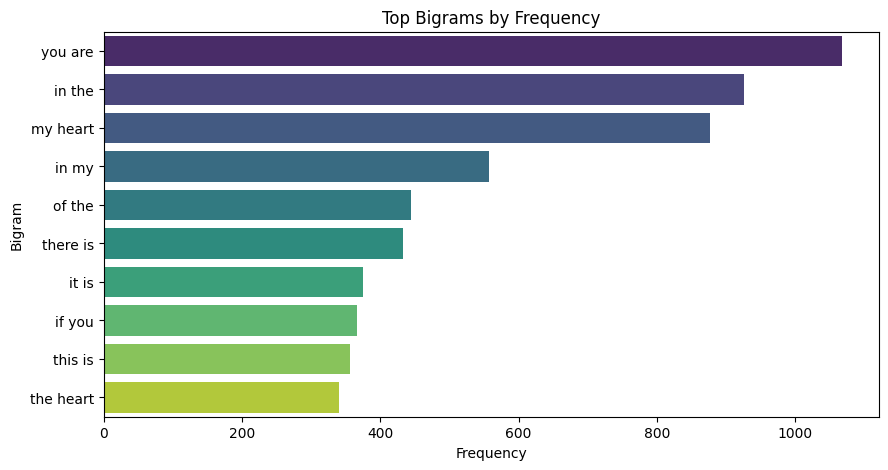

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
# Generate bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform([all_lyrics])
bigram_freq = bigrams.toarray().flatten()
bigram_features = vectorizer.get_feature_names_out()

# Create a DataFrame with bigrams and their frequencies
bigram_df = pd.DataFrame({'bigram': bigram_features, 'frequency': bigram_freq})

# Plot the most common bigrams
top_n = 10  # Change this to see more/less bigrams
top_bigrams = bigram_df.nlargest(top_n, 'frequency')

plt.figure(figsize=(10, 5))
sns.barplot(x='frequency', y='bigram', data=top_bigrams, palette='viridis')
plt.title('Top Bigrams by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

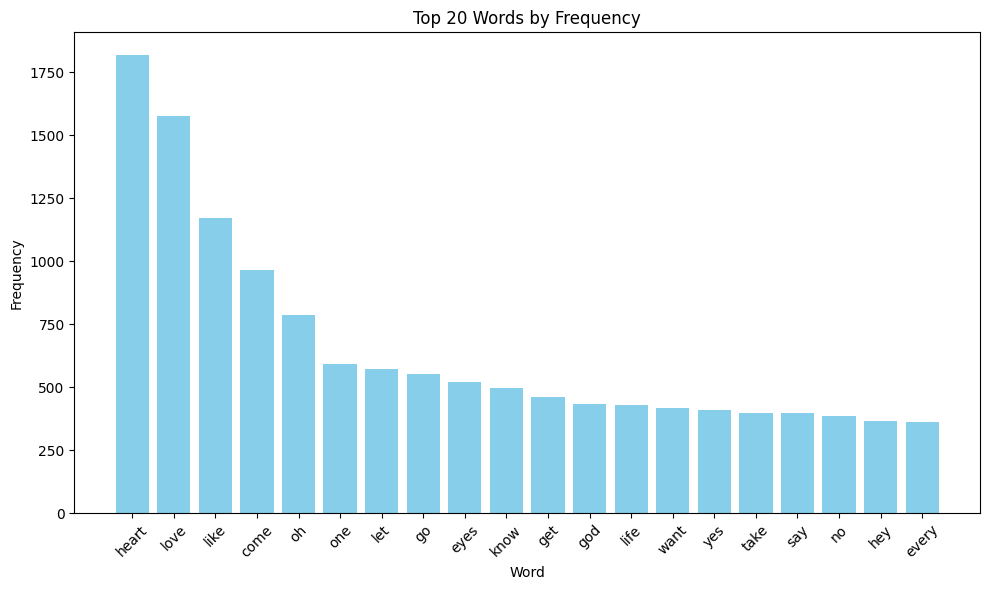

In [49]:
all_text = ' '.join(df['Processed_Translated_Lyrics'])

vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform([all_text])
words = vectorizer.get_feature_names_out()
word_freq = word_counts.toarray().sum(axis=0)

df_word_freq = pd.DataFrame({'Word': words, 'Frequency': word_freq})
df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)
df_top20_words = df_word_freq.head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_top20_words['Word'], df_top20_words['Frequency'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df['translated_Lyrics'] = df['translated_Lyrics'].str.replace("maula", "love", case=False)

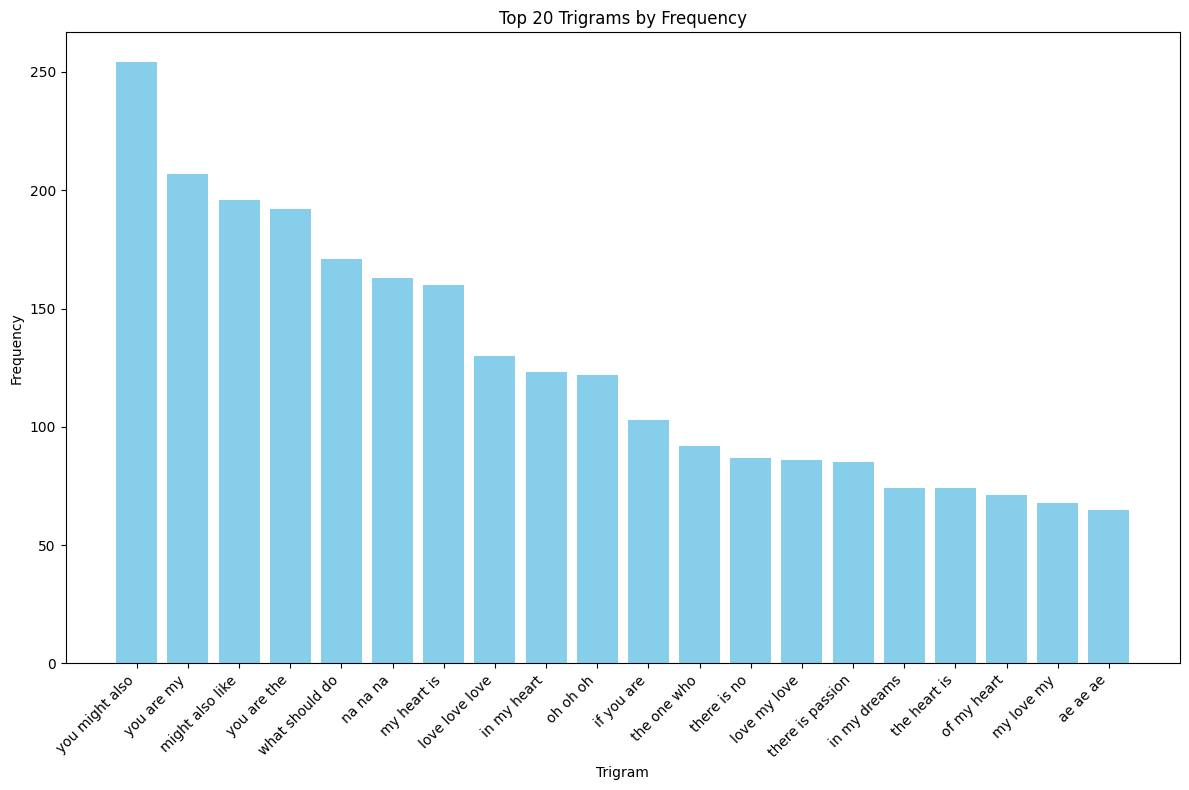

In [10]:
vectorizer = CountVectorizer(ngram_range=(3, 3))
all_lyrics = ' '.join(df['translated_Lyrics'])

# Fit and transform the text
trigram_counts = vectorizer.fit_transform([all_lyrics])

# Get feature names (trigrams)
trigrams = vectorizer.get_feature_names_out()

# Sum up the counts of each trigram
trigram_freq = trigram_counts.toarray().sum(axis=0)

# Create a DataFrame to store trigrams and their frequencies
df_trigram_freq = pd.DataFrame({'Trigram': trigrams, 'Frequency': trigram_freq})

# Sort by frequency in descending order
df_trigram_freq = df_trigram_freq.sort_values(by='Frequency', ascending=False)

# Select top 20 trigrams
df_top20_trigrams = df_trigram_freq.head(20)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(df_top20_trigrams['Trigram'], df_top20_trigrams['Frequency'], color='skyblue')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 20 Trigrams by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
df.to_csv(r"C:\Users\rajsi\OneDrive\Desktop\git_unsw\Bollywoodsongs-sentimentanalysis-\data\cleaned_file.csv",index=False)

In [39]:
pd.read_csv(r"C:\Users\rajsi\OneDrive\Desktop\git_unsw\Bollywoodsongs-sentimentanalysis-\data\cleaned_file.csv")

,Unnamed: 0,songs,artist,year,Lyrics,translated_Lyrics,Processed_Translated_Lyrics
0,0,Ole Ole,Abhijeet,1994,"Ole ole dil dole dil bole,Main tera tu meri ma...","Ole ole heart sway heart said,I am yours in me...",ole ole heart sway heart said love love ole ol...
1,1,Yeh Raat Aur Yeh Doorie,"Asha Bhosle, S.P. Balasubrahmanyam",1994,"Zaroori,Ye raat aur ye doori, tera milna hai z...","Zaroori,This night and this distance, I defini...",zaroori night distance definitely need meet he...
2,2,Aaja Meri Gaadi Mein Baith Jaa,"Baba Sehgal, Anu Malik",1994,"Dhup mein chalongi to baal pak jayenge,Paidal ...",If you walk in the sun the hair will get cooke...,walk sun hair get cooked walk feet feet get ti...
3,3,Meri Pant Bhi Sexy,"Govinda, Alka Yagnik",1994,"Arey ek hai anaar yahan,Kitne bimar yaha,Ye bh...","Hey there is a pineapple here, so many sick pe...",hey pineapple many sick people give every sing...
4,4,Dil Mein Tere,"Jolly Mukherjee, Alka Yagnik",1994,"Dil Dil Dil Dil Mai Tere Pyar Me Khoya,Mai Sar...","Dil heart heart I am lost in your love,I didn'...",dil heart heart lost love sleep whole night lo...
...,...,...,...,...,...,...,...
525,525,Bachpan Ka Pyaar,Badshah,2024,"Jaane meri jaaneman, bachpan ka pyaar mera bhu...","Dear my love, I will never forget my childhood...",dear love never forget childhood love way love...
526,526,Paani Paani,Badshah,2024,"Main toh tere vaaste huyi paani paani,Saare aa...",I was the water that fell under your possessio...,water fell possession youth looted publicly x2...
527,527,Jugnu,Badshah,2024,Ho jo na paas tu to aati dhangh se saanse nahi...,"If you are not near me, I can't breathe easily...",near breathe easily remain irritated feel noth...
528,528,Bad Boy X Bad Girl,Badshah,2024,"I Like The Way You Move Right There,Blow My Mi...","I Like The Way You Move Right There,Blow My Mi...",like way move right blow mind everytime come a...
